# May 2022 InterviewQs

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# 5/13 Question

 Suppose you're analyzing a population of 100,000 people, and you're trying to understand life expectancy. Within this population of 100,000 people, 75% can expect to live to the age of 70, while 45% can expect to live to age 80. Given that a person is 70, what is the probability that they live to the age 80? 
 
 
## Approach

From Bayes' Therorum, we know that:

P(A|B) = P(B|A)*P(A) / P(B)

Let's consider A living to 80, and B living to 70 in this case.

P(B | A) = P(living to 70 given you are 80). This is 1, because if you are 80 you have already lived to 70.
P(A) is given as 45%, and P(B) is given as 75%.

Thus: P(A|B) = 1*.45/.75 = 0.6

# 5/11 Question

Can you check if a given array containing n integers is  monotonic? Your function should return "true" if it is monotonic and "false" if it's not.


    
An array is monotonic if it is either monotone increasing or monotone decreasing. An array A is monotone increasing if for all i <= j, A[i] <= A[j]. An array A is monotone decreasing if for all i <= j, A[i] >= A[j].
    
## Approach

For this problem I will create a function that will:
- create two variables, one to track if an array position is lower than the next position, and vice versa
- loop through the array, and add a point to one of the above variables depending on if array[i] is less or greater than array[i+1]
- if both the increase and decrease variables have a non-zero value, the array is not monotonic so we should return False. Otherwise return True

In [120]:
def monotone_check(arr):
    incr,decr=0,0
    for i in range(len(arr)-1):
        if arr[i]<arr[i+1]:
            incr+=1
        else:
            decr+=1
        if incr and decr:
            return False
    return True

## 5/6 Question

Suppose you have two tables, one called 'orders', and one called 'revenue', as shown below: 
    

    

 Orders: 


|order_id|	channel|	date|	month|
|---|---|---|---|
|0	|1	|Online	|2018-09-01	|September
|1	|2	|Online	|2018-09-03	|September
|2	|3	|In_store	|2018-10-11	|October
|3	|4	|In_store	|2018-08-21	|August
|4	|5	|Online	|2018-08-13	|August
|5	|6	|Online	|2018-10-29	|October
    

    
 Revenue: 


    
|order_id|	revenue|
|---|---|
|0	|1	|100|
|1	|2	|125|
|2	|3	|200|
|3	|4	|80|
|4	|5	|200|
|5	|6	|100|
    

    
## Approach 

 Using SQL, write a query to show the total revenue by channel for the months of September and October.
 
 select a.channel, a.month, sum(revenue) from <br>
 Orders a join Revenue b on a.order_id = b.order_id<br>
 GROUP BY a.channel, a.month

# 5/4 Question 

Suppose we have selected a group of people to take a survey. 35% of the group like Uber, 20% like both Lyft and Uber, and 25% like neither Lyft nor Uber. Given this information, what percentage of the sample likes Lyft?

From basic probability theory, we know that:
P(A and B) = P(A)*P(B)

In this case, let's consider A to be probability of liking Lyft and B probability of liking Uber. From the prompt we know that:

P(A and B) = 20%
P(B) = 35%

Thus, P(A) = P(A and B) / P(B) = 20%/35% so:

P(A) = 57%


# 5/2 Question

Given the following dataset, can you create a decision tree to predict customer churn? 

For simplicity, you can set the maximum depth of the decision tree to 4. 

For the purpose of this exercise, you do not need to optimize the model. 

For this question, I will use Python's sk-learn tools to fit and train a decision tree:

In [5]:
# import required libraries

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import OneHotEncoder

In [92]:
#import data

data_05_02 = pd.read_csv("https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/teleco_user_data.csv")

In [116]:
# map target variable to be numeric, and TotalCharges to be of type float for modelling

data_05_02.Churn = data_05_02.Churn.map({'No':0,'Yes':1})
data_05_02.TotalCharges = data_05_02.TotalCharges.replace({'':'0'})
data_05_02.TotalCharges = data_05_02.TotalCharges.replace({' ':'0'})
data_05_02.TotalCharges = data_05_02.TotalCharges.astype(float)

In [94]:
# view data to get a sense of structure
data_05_02.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [96]:
# view whether there are any null values, and data types

data_05_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [97]:
# get rid of ID, since it is not relevant to modelling

data_05_02.drop('customerID',axis=1,inplace=True)

In [98]:
# shuffle data before splitting it, in case it is sorted

data_05_02 = shuffle(data_05_02,random_state=42)

In [99]:
# check to see split of the target variable outcomes

data_05_02['Churn'].value_counts(normalize=True) #73% 0s

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [100]:
# split data into X and y sets for modelling

X=data_05_02.drop('Churn',axis=1)
y=data_05_02['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [101]:
# use encoding to make categorical cols possible to read by the sk-learn modelling tools

#create col names
categorical_vars = ['gender','Partner','Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

#insantiate encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first') #returns an array rather than an object

#create arrays with encoded vals
X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

#get feature names as rows and put it back in the array of dummy vars
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded,columns=encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1) #concat cols, make sure that all cols line up with drop=True
X_train.drop(categorical_vars,axis=1, inplace=True)

X_test_encoded = pd.DataFrame(X_test_encoded,columns=encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1) #concat cols, make sure that all cols line up with drop=True
X_test.drop(categorical_vars,axis=1, inplace=True)

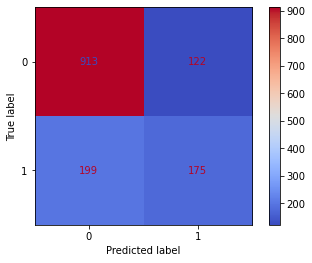

In [117]:
# create, fit and train decision tree algorithm and display confusion matrix results

clf=DecisionTreeClassifier(random_state=42,max_depth=4)
clf.fit(X_train,y_train)

################################################
## Assesment
################################################

y_pred_class = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]


confusion_matrix(y_test, y_pred_class)

plot_confusion_matrix(clf,X_test,y_test,cmap='coolwarm')

In [113]:
#Accuracy ((# of correct classifactions out of all attempted classifications))

accuracy_score(y_test,y_pred_class)

0.7721788502484032

In [114]:
# Precision (of all observations that were predicted +, how many were actually +)

precision_score(y_test,y_pred_class)

0.5892255892255892

In [115]:
#Recall (of all + observations, how many did we predict as +)

recall_score(y_test,y_pred_class)

0.4679144385026738

In [111]:
#f1 score (harmonic mean of recall and precision)

f1_score(y_test,y_pred_class)

0.5216095380029806